In [22]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
from numpy import linalg as la

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


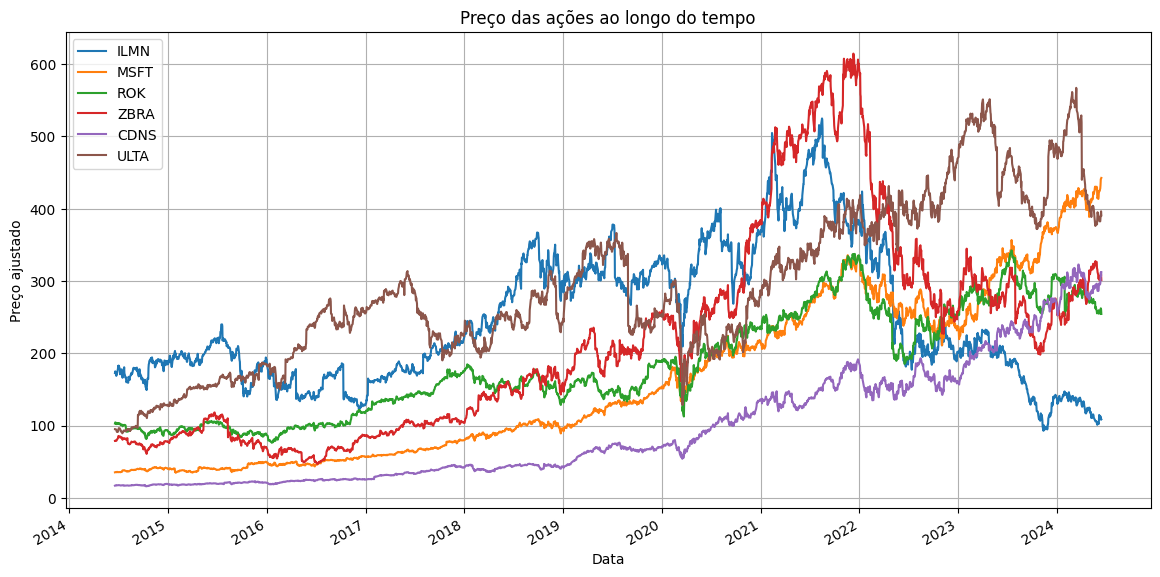

In [32]:
lista_acoes = ["ILMN", "MSFT", "ROK", "ZBRA", "CDNS", "ULTA"]

data_final = dt.datetime.now()
data_inicial = data_final - dt.timedelta(days=365*10)

price = pd.DataFrame()

for ticker in lista_acoes:
    price[ticker] = yf.download(ticker, start=data_inicial, end=data_final)['Adj Close']

price.plot(figsize=(14, 7))
plt.title('Preço das ações ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Preço ajustado')
plt.grid()
plt.show()


In [10]:
retornos = price.pct_change().dropna()
media_retornos = retornos.mean()
matriz_cov = retornos.cov()
pesos_carteira = np.full(len(lista_acoes), 1/len(lista_acoes))
numero_acoes = len(lista_acoes)

In [41]:
numero_simulacoes = 100000 # se demorar o for basta diminuir esse número
dias_proj = 252 * 5 # em média temos 252 dias úteis
capital_inicial = 5000

In [42]:
retorno_medio = retornos.mean(axis = 0).to_numpy()
matriz_retorno_medio = retorno_medio * np.ones(shape= (dias_proj, numero_acoes))


In [43]:
L = la.cholesky(matriz_cov)
L

array([[0.02596532, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.00723906, 0.0154285 , 0.        , 0.        , 0.        ,
        0.        ],
       [0.00655921, 0.00693256, 0.01609953, 0.        , 0.        ,
        0.        ],
       [0.00944794, 0.00848735, 0.00702004, 0.020152  , 0.        ,
        0.        ],
       [0.00778561, 0.01026037, 0.0026691 , 0.00198402, 0.01394268,
        0.        ],
       [0.00589448, 0.0058317 , 0.00566408, 0.00193961, 0.0009795 ,
        0.02105622]])

In [44]:
retornos_carteiras = np.zeros([dias_proj, numero_simulacoes])
montante_final = np.zeros(numero_simulacoes)

for s in range(numero_simulacoes):
    Rpdf = np.random.normal(size=(dias_proj, numero_acoes))
    retornos_sintaticos = matriz_retorno_medio + np.inner(Rpdf, L)

    retornos_carteiras[:, s] = np.cumprod(np.inner(pesos_carteira, retornos_sintaticos)+ 1) * capital_inicial
    montante_final[s] = retornos_carteiras[-1, s]

montante_final

array([ 9290.57042488, 24251.32718624, 12159.26662613, ...,
       13728.71494026, 16061.60395182, 13314.99729694])

In [45]:
montante_99 = str(np.percentile(montante_final, 1))
montante_95 = str(np.percentile(montante_final, 5))
montante_mediano = str(np.percentile(montante_final, 50))
cenarios_lucrativos = str((len(montante_final[montante_final > capital_inicial])/
                               len(montante_final))*100) + "%"

In [51]:
print(f""" ao investir R$5000,00 na carteira {lista_acoes}
podemos esperar esses resultados para os próximos 5 anos
Com 50% de probabilidade, o montante será maior que R${montante_mediano:.8}.
Com 95% de probabilidade, o montante será entre R${montante_95:.8}.
Com 99% de probabilidade, o montante será entre R${montante_99:.8}.
Em {cenarios_lucrativos:.5}% dos cenarios, foi possível obter lucro nos próximos 5 anos""")

 ao investir R$5000,00 na carteira ['ILMN', 'MSFT', 'ROK', 'ZBRA', 'CDNS', 'ULTA'] 
podemos esperar esses resultados para os próximos 5 anos
Com 50% de probabilidade, o montante será maior que R$12031.04.
Com 95% de probabilidade, o montante será entre R$4901.609.
Com 99% de probabilidade, o montante será entre R$3379.019.
Em 94.62% dos cenarios, foi possível obter lucro nos próximos 5 anos


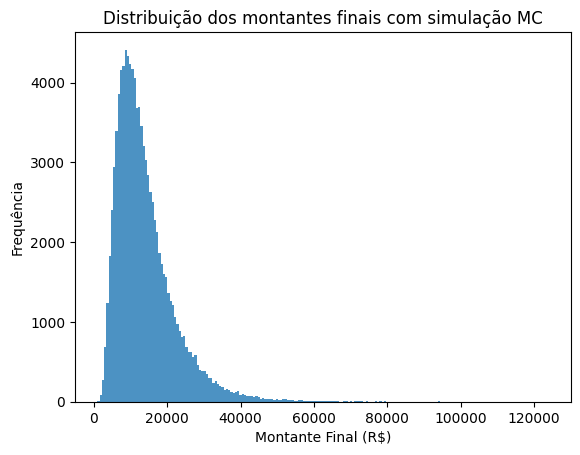

In [57]:
config = dict(histtype = "stepfilled", alpha = 0.8, density = False, bins = 200)
fig, ax = plt.subplots()
ax.hist(montante_final, **config)
plt.title("Distribuição dos montantes finais com simulação MC")
plt.xlabel("Montante Final (R$)")
plt.ylabel("Frequência")
plt.show()